# Hands-on Exercise for CLUS Module


### 0. Setting up necessary packages and creating data 

In [1]:
!pip install --user scikit-learn --upgrade

Traceback (most recent call last):
  File "/usr/local/anaconda5/bin/pip", line 7, in <module>
    from pip import main
ImportError: cannot import name 'main'


Import necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples



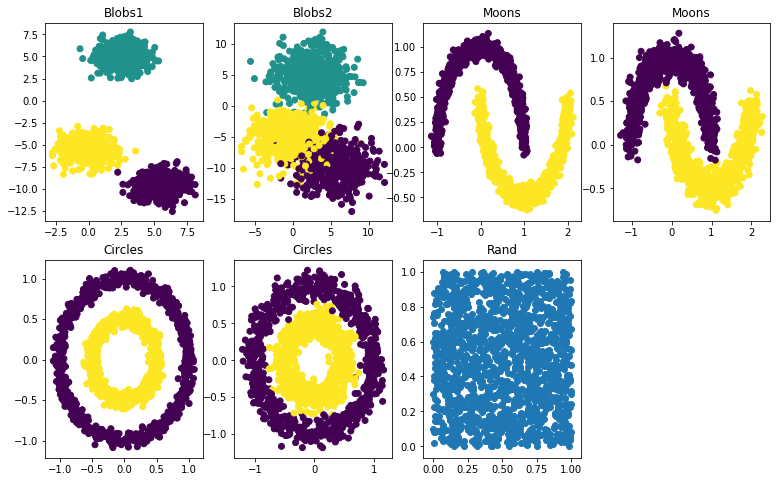

In [3]:
n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

Code for RandIndex function

In [4]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

Code for Hopkins statistic

In [5]:
from sklearn.neighbors import NearestNeighbors 
from random import sample 
from numpy.random import uniform 
from math import isnan
def hopkins(X):
    n=X.shape[0]#rows
    d=X.shape[1]#cols
    p=int(0.1*n)#considering 10% of points
    nbrs=NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X=sample(range(0,n),p)
    uj=[]
    wj=[]
    for j in range(0,p):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        uj.append(u_dist[0][1])#distances to nearest neighbors in random data
        w_dist,_=nbrs.kneighbors(X[rand_X[j]].reshape(1,-1),2,return_distance=True)
        wj.append(w_dist[0][1])#distances to nearest neighbors in real data
    H=sum(uj)/(sum(uj)+sum(wj))
    if isnan(H):
        print(uj,wj)
        H=0
        
    return H

Code for Silhouette coefficient

In [6]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

### 1. K-Means clustering

<span style="color:red">**Question 1a:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>

<span style="color:red">**Question 1b:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 1c:** </span> Run K-Means algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of K-means performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 1d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using K-means. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 1e:** </span> Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>



### 2. Agglomerative Clustering - Single Link

<span style="color:red">**Question 2a:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 2b:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 2c:** </span> Run Single-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Single-link agglomerative algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 2d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Single-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 2e:** </span> Are the rankings in 2(c) consistent with your observations in 2(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>



### 3. Agglomerative Clustering - Max Link

<span style="color:red">**Question 3a:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 3b:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 3c:** </span> Run Max-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Max-link agglomerative algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 3d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Max-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 3e:** </span> Are the rankings in 3(c) consistent with your observations in 3(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>



### 4. Agglomerative Clustering - Average Link

<span style="color:red">**Question 4a:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 4b:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 4c:** </span> Run Average-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Average-link agglomerative algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 4d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Average-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 4e:** </span> Are the rankings in 4(c) consistent with your observations in 4(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>



### 5. Density Based Clustering: DBSCAN

<span style="color:red">**Question 5a:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 5b:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>




<span style="color:red">**Question 5c:** </span> Run DBSCAN clustering algorithm on all the datasets (except Rand). __Choose eps and min_samples parameters to make sure that DBSCAN finds the same number of clusters as in the ground truth ('Data_y').__ Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of DBSCAN clustering algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 5d:** </span> For each of the datasets, how many noise points did the DBSCAN algorithm find? Which three datasets had the least number of noise points? Explain the reason(s) why these datasets had least noise points?

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 5e:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using DBSCAN clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 5f:** </span> Are the rankings in 5(c) consistent with your observations in 5(e)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>



### 6. Spectral Clustering

<span style="color:red">**Question 6a:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 6b:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 6c:** </span> Run Spectral clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Spectral clustering algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 6d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Spectral clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 6e:** </span> Are the rankings in 6(c) consistent with your observations in 6(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>



### 7. Clustering Tendency

<span style="color:red">**Question 7a:** </span> Without using any metrics, for all the datasets (INCLUDING __Rand__) provided in the practice session, list the datasets that exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 7b:** </span> Without using any metrics, for all the datasets (INCLUDING Rand) provided in the practice session, list the datasets that do NOT exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 7c:** </span> Compute Hopkins Statistic statistic for all the datasets and rank them based on decreasing order of this metric.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 7d:** </span> Are your answers for 7(a) and 7(b) consistent with that of (c)? If not, explain the reason for this inconsistency.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 7e:** </span> Run all the above clustering algorithms (KMeans, GMM, Agglomerative (single, max, average), DBSCAN, Spectral), using n_clusters = 3, on Rand dataset and visualize the clusters. Explain the reason for the shapes of clusters dervied using each clustering approach.

<span style="color:green">**Answer:** </span>



### 8. Real-world dataset

We will use the same breast cancer dataset we used for Classificatione exercise here.

In [7]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [10]:
Cancer_X = cancer.data
Cancer_y = cancer.target

Size of Cancer_X and Cancer_y

In [11]:
Cancer_X.shape

(569, 30)

In [12]:
Cancer_y.shape

(569,)

<span style="color:red">**Question 8a:** </span> Compute SSE for k = range(2,40), i.e, for k=2,3,4,...,40

<span style="color:red">**Question 8b:** </span> Plot SSE values for k = range(2,40), i.e, for k=2,3,4,...,40

<span style="color:red">**Question 8c:** </span> Using this plot, determine the 'k' that you will use to do K-Means clustering.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 8d:** </span> Using the 'k' you chose in (c), compute k-Means clustering.

<span style="color:red">**Question 8e:** </span> Plot the silhouette values for points in each cluster (using the silhouette() function provided in the practice notebook). .

<span style="color:red">**Question 8f:** </span> Comment on the quality of the clusters discovered using k-Means. Which of the clusters would you treat as good clusters and which clusters do you treat as not-so-good clusters?

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 8g:** </span> Compute the Rand Index of the k-means clusters with respect to the true labels. Comment on the quality of the clustering based on the Rand-Index score.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 8h:** </span> To use DBSCAN to find clusters in this data, one needs to determine eps and min_samples. To do this, consider the range of values eps = 50, 100, 150, 200, 250, 300, 400, 500 and min_samples = 10, 15, 20, 25, 30. 

For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of clusters obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of clusters, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

max(y_pred)+1

<span style="color:red">**Question 8i:** </span> For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of noise points obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of noise points, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

sum(y_pred==-1)

<span style="color:red">**Question 8j:** </span> What observations can you make about the clustering structure in this data, based on the matrices you generated for 8(g) and 8(h)?

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 8k:** </span> Select the parameters for eps, min_samples based on your answers for 8(g), 8(h) and 8(i). Compute cluster assigments using DBSCAN. Compute RandIndex of the cluster assignments with respect to the true labels.

<span style="color:red">**Question 8l:** </span> Compare RandIndex from 8(g) with that of 8(k) and determine which algorithm performed best? Based on this, comment on how the data/clusters may be distributed in $R^d$.

<span style="color:green">**Answer:** </span>

